### Main steps of this notebook
- checking the distrubtion of the target variable to determine which metric to use
- create a base model
- investigate some features importances
- investigate some features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_tr = pd.read_csv('training.csv', sep=';')
df_va = pd.read_csv('validation.csv', sep=';')

In [17]:
df_tr.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


#### check distrubtion of target variable

In [18]:
df_tr.classLabel.value_counts()

yes.    3424
no.      276
Name: classLabel, dtype: int64

In [19]:
df_va.classLabel.value_counts()

no.     107
yes.     93
Name: classLabel, dtype: int64

#### since training data is highly unbalanced accuracy is out of the way to use as our metirc, we will go with AUC metric

#### creating base model

In [3]:
x = df_tr.copy()
y = x.classLabel
x = x.drop('classLabel', axis=1)
x = x.fillna(-999)

xv = df_va.copy()
yv = xv.classLabel
xv = xv.drop('classLabel', axis=1)
xv = xv.fillna(-999)

#### using label encoder on object features

In [4]:
for c in x.columns[x.dtypes == 'object']:
    x[c] = x[c].factorize()[0]
for c in xv.columns[xv.dtypes == 'object']:
    xv[c] = xv[c].factorize()[0]

y = y.factorize()[0]
yv = yv.factorize()[0]

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

#utility to print auc on training and validation given model
def print_score(m):
    print(roc_auc_score(y, m.predict(x)), roc_auc_score(yv, m.predict(xv)))

#### trainig a randomforest

In [6]:
rf = RandomForestClassifier()
rf.fit(x,y)

/home/magdy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### we get a base score of 0.5 on the validation set

In [7]:
print_score(rf)

1.0 0.49497537935885844


#### plot the features importance from rf

([<matplotlib.axis.XTick at 0x7f28b62405c0>,
 <a list of 18 Text xticklabel objects>)

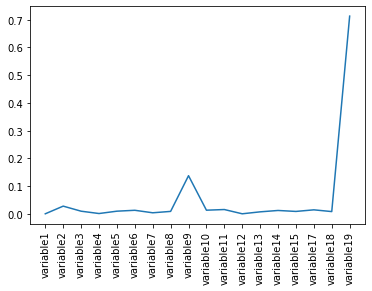

In [9]:
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(x.shape[1]), x.columns.to_list(), rotation=90)

#### we see variable 19 is domainting the importance of other features, let's investigate it

In [11]:
x['variable19'].unique()

array([0, 1])

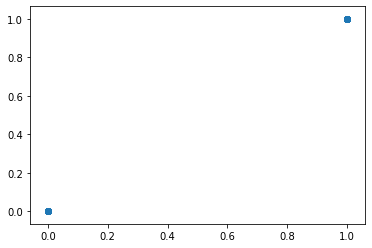

In [13]:
plt.scatter(x['variable19'], y)

In [25]:
print(len(df_tr[df_tr['classLabel'] == 'no.']))
df_tr[df_tr['classLabel'] == 'no.'].variable19.value_counts()

276


0    276
Name: variable19, dtype: int64

In [26]:
print(len(df_tr[df_tr['classLabel'] == 'yes.']))
df_tr[df_tr['classLabel'] == 'yes.'].variable19.value_counts()

3424


1    3424
Name: variable19, dtype: int64

### we see that variable19 is same variable as the target variable, so we can't use it in training or model will just learn to predict this variable and overfit to training data

#### now drop it, and build a new base model

In [27]:
x = df_tr.copy()
y = x.classLabel
x = x.drop('classLabel', axis=1)
x = x.drop('variable19', axis=1)
x = x.fillna(-999)

xv = df_va.copy()
yv = xv.classLabel
xv = xv.drop('classLabel', axis=1)
xv = xv.drop('variable19', axis=1)
xv = xv.fillna(-999)

In [28]:
for c in x.columns[x.dtypes == 'object']:
    x[c] = x[c].factorize()[0]
for c in xv.columns[xv.dtypes == 'object']:
    xv[c] = xv[c].factorize()[0]

y = y.factorize()[0]
yv = yv.factorize()[0]

In [29]:
rf = RandomForestClassifier()
rf.fit(x,y)

/home/magdy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
print_score(rf)

0.9963768115942029 0.32850969751783743


#### our model perform worst on the validation data, but we will handle it with hyper-parameter tuning

([<matplotlib.axis.XTick at 0x7f28ae1316a0>,
 <a list of 17 Text xticklabel objects>)

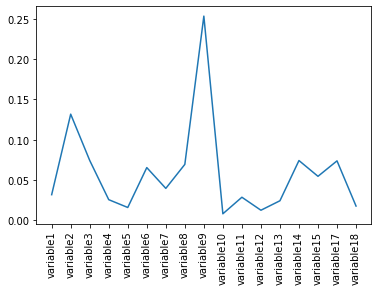

In [31]:
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(x.shape[1]), x.columns.to_list(), rotation=90)

#### now our feature importances looks a lot better

#### let's investigate some of the important features

In [33]:
df_tr.dtypes

variable1      object
variable2      object
variable3      object
variable4      object
variable5      object
variable6      object
variable7      object
variable8      object
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     object
variable14    float64
variable15      int64
variable17    float64
variable18     object
variable19      int64
classLabel     object
dtype: object

In [35]:
df_tr.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


#### we have a lot of object features, but looks like they're numeric features but encoded, we will make them numeric on our preprocessing

#### Let's see the correlation of the features

In [37]:
df_tr.corr()

,variable11,variable14,variable15,variable17,variable19
variable11,1.000000,-0.153148,-0.007082,-0.153148,0.153039
variable14,-0.153148,1.000000,0.157323,1.000000,-0.051042
variable15,-0.007082,0.157323,1.000000,0.157323,0.066893
variable17,-0.153148,1.000000,0.157323,1.000000,-0.051042
variable19,0.153039,-0.051042,0.066893,-0.051042,1.000000


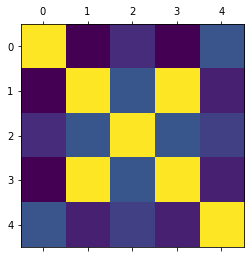

In [36]:
plt.matshow(df_tr.corr())
plt.show()

#### becuase the data has a lot of object variables, let's load data after we process it to see correlations

In [39]:
df = pd.read_csv('df_tr.csv')

In [41]:
df.corr()

,variable2,variable3,variable8,variable9,variable10,variable11,variable14,variable15,variable17,classLabel,...,variable4_u,variable4_y,variable5_g,variable5_gg,variable5_p,variable13_g,variable13_p,variable13_s,variable18_f,variable18_t
variable2,1.000000,0.259070,0.487803,0.121163,-0.073376,0.211979,-0.098213,-0.005250,-0.144611,0.069847,...,0.124454,-0.131558,0.124454,-0.105218,-0.131558,0.061239,0.029722,-0.092100,-0.086659,0.073526
variable3,0.259070,1.000000,0.343848,0.228813,-0.184641,0.306006,-0.085898,0.141222,-0.255495,0.102007,...,0.104121,-0.082495,0.104121,0.092337,-0.082495,0.103280,-0.040868,-0.094848,-0.109008,0.091035
variable8,0.487803,0.343848,1.000000,0.207851,-0.177360,0.304266,-0.057964,-0.004123,-0.195718,0.141394,...,0.119833,-0.098042,0.119833,0.033626,-0.098042,0.060443,-0.118072,0.007070,-0.095498,0.213087
variable9,0.121163,0.228813,0.207851,1.000000,-0.399801,0.238122,0.119066,-0.042271,-0.079790,0.545244,...,0.278369,-0.118393,0.278369,-0.228681,-0.118393,0.336627,-0.366284,-0.154229,-0.228720,0.181712
variable10,-0.073376,-0.184641,-0.177360,-0.399801,1.000000,-0.497864,-0.016813,-0.002502,0.071133,-0.218894,...,-0.201569,0.124772,-0.201569,0.115628,0.124772,-0.311187,0.185204,0.244529,0.507300,-0.499358
variable11,0.211979,0.306006,0.304266,0.238122,-0.497864,1.000000,-0.051022,-0.007082,-0.140458,0.153039,...,0.091950,-0.053150,0.091950,-0.057567,-0.053150,0.161374,-0.092206,-0.129357,-0.252567,0.265568
variable14,-0.098213,-0.085898,-0.057964,0.119066,-0.016813,-0.051022,1.000000,0.065466,0.754423,-0.049036,...,0.073612,0.123160,0.073612,0.093574,0.123160,0.246944,-0.510621,0.047653,0.017358,0.009406
variable15,-0.005250,0.141222,-0.004123,-0.042271,-0.002502,-0.007082,0.065466,1.000000,0.145232,0.066893,...,-0.074453,-0.041413,-0.074453,0.512242,-0.041413,-0.118555,0.300785,-0.059859,0.075438,0.052220
variable17,-0.144611,-0.255495,-0.195718,-0.079790,0.071133,-0.140458,0.754423,0.145232,1.000000,-0.053624,...,-0.111237,0.134285,-0.111237,0.129626,0.134285,0.007736,-0.065082,0.034118,0.049817,-0.030382
classLabel,0.069847,0.102007,0.141394,0.545244,-0.218894,0.153039,-0.049036,0.066893,-0.053624,1.000000,...,0.100014,-0.127465,0.100014,0.026518,-0.127465,0.038995,0.035445,-0.069625,-0.176833,0.104211


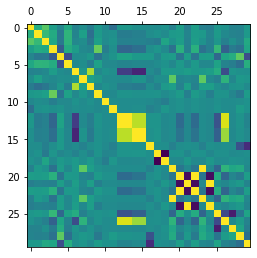

In [40]:
plt.matshow(df.corr())
plt.show()

### nothing looks suspicious, let's move to preprocessing data